# 012: The Van der Pol Oscillator

Modeling relaxation oscillations and nonlinear damping in neural systems.

## Learning Objectives

By the end of this tutorial, you will be able to:

- Understand the Van der Pol equations and the role of parameter $\mu$
- Distinguish between harmonic oscillations ($\mu \approx 0$) and relaxation oscillations ($\mu >> 1$)
- Simulate Van der Pol oscillators across different parameter regimes
- Explain why relaxation oscillations are relevant for neural dynamics

## Background / Theory

### The Van der Pol Oscillator

The **Van der Pol oscillator** was originally developed by Balthasar van der Pol in 1926 to model electrical circuits with vacuum tubes. It has since become a paradigmatic model for **relaxation oscillations** - oscillations characterized by slow buildup and rapid discharge phases.

### Original Form (Second-Order)

$$
\frac{d^2x}{dt^2} - \mu(1 - x^2)\frac{dx}{dt} + x = 0
$$

### Two-Dimensional Form (Lienard Transformation)

BrainMass uses the Lienard form:

$$
\begin{aligned}
\dot{x} &= \mu\left(x - \frac{x^3}{3} - y\right) + I_x(t) \\
\dot{y} &= \frac{x}{\mu} + I_y(t)
\end{aligned}
$$

### The Key Parameter: $\mu$

| $\mu$ Value | Oscillation Type | Characteristics |
|-------------|------------------|------------------|
| $\mu \to 0$ | Nearly harmonic | Sinusoidal waveform |
| $\mu \approx 1$ | Transition | Mixed character |
| $\mu >> 1$ | Relaxation | Sharp transitions, flat plateaus |

### Neuroscience Relevance

The Van der Pol oscillator captures features of neural dynamics:
- **Slow-fast dynamics**: Rapid action potentials followed by slower recovery
- **Threshold behavior**: Excitation must exceed threshold for transition
- **Refractory period**: Post-spike period of reduced excitability

It is closely related to the FitzHugh-Nagumo model.

## Background / Theory

### The Van der Pol Oscillator

The **Van der Pol oscillator** was originally developed by Balthasar van der Pol in 1926 to model electrical circuits with vacuum tubes. It has since become a paradigmatic model for **relaxation oscillations** - oscillations characterized by slow buildup and rapid discharge phases.

### Original Form (Second-Order)

$$
\frac{d^2x}{dt^2} - \mu(1 - x^2)\frac{dx}{dt} + x = 0
$$

### Two-Dimensional Form (Lienard Transformation)

BrainMass uses the Lienard form:

$$
\begin{aligned}
\dot{x} &= \mu\left(x - \frac{x^3}{3} - y\right) + I_x(t) \\
\dot{y} &= \frac{x}{\mu} + I_y(t)
\end{aligned}
$$

### The Key Parameter: $\mu$

| $\mu$ Value | Oscillation Type | Characteristics |
|-------------|------------------|------------------|
| $\mu \to 0$ | Nearly harmonic | Sinusoidal waveform |
| $\mu \approx 1$ | Transition | Mixed character |
| $\mu >> 1$ | Relaxation | Sharp transitions, flat plateaus |

### Neuroscience Relevance

The Van der Pol oscillator captures features of neural dynamics:
- **Slow-fast dynamics**: Rapid action potentials followed by slower recovery
- **Threshold behavior**: Excitation must exceed threshold for transition
- **Refractory period**: Post-spike period of reduced excitability

It is closely related to the FitzHugh-Nagumo model (Tutorial 014).

In [1]:
import brainunit as u
import matplotlib.pyplot as plt
import numpy as np

import brainmass
import brainstate

# Set simulation time step
brainstate.environ.set(dt=0.1 * u.ms)

In [2]:
import brainmass
import brainstate
import braintools
import brainunit as u
import matplotlib.pyplot as plt
import numpy as np

# Set simulation time step
brainstate.environ.set(dt=0.1 * u.ms)

In [3]:
# Create Van der Pol oscillator
node = brainmass.VanDerPolStep(
    1,  # single node
    mu=1.0,  # moderate nonlinearity
)

# Initialize states
node.init_all_states()

# Set initial condition away from origin
node.x.value = np.array([0.5])
node.y.value = np.array([0.0])

print(f"mu = {node.mu.value()}")

mu = 1.0


In [4]:
# Define simulation step
def step_run(i):
    node.update()
    return node.x.value, node.y.value


# Run simulation (2000 ms for slower dynamics)
indices = np.arange(20000)
x_trace, y_trace = brainstate.transform.for_loop(step_run, indices)

In [5]:
# Define simulation step
def step_run(i):
    with brainstate.environ.context(i=i, t=i * brainstate.environ.get_dt()):
        node.update()
        return node.x.value, node.y.value

# Run simulation (2000 ms for slower dynamics)
indices = np.arange(20000)
x_trace, y_trace = brainstate.transform.for_loop(step_run, indices)

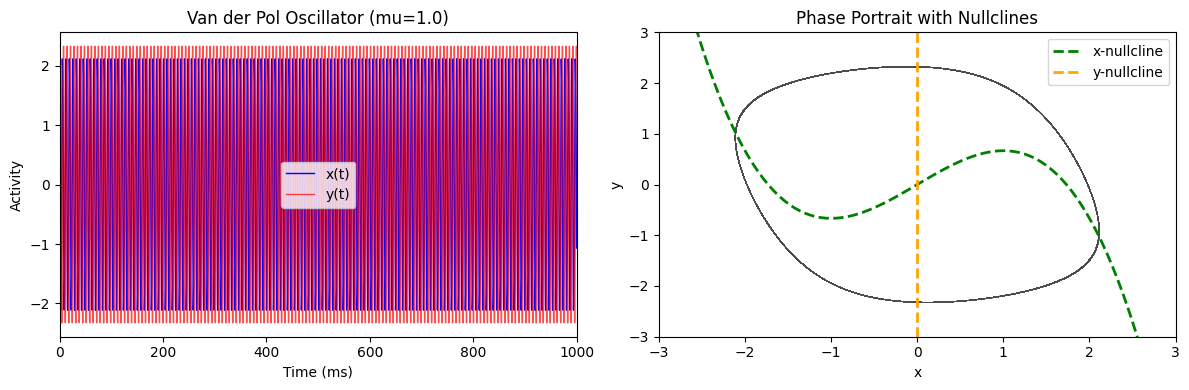

In [6]:
t_ms = indices * brainstate.environ.get_dt()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Time series
axes[0].plot(t_ms, x_trace[:, 0], 'b-', label='x(t)', linewidth=1)
axes[0].plot(t_ms, y_trace[:, 0], 'r-', label='y(t)', linewidth=1, alpha=0.7)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Activity')
axes[0].set_title(f'Van der Pol Oscillator (mu={node.mu.value()})')
axes[0].legend()
axes[0].set_xlim([0, 1000])

# Phase portrait
axes[1].plot(x_trace[:, 0], y_trace[:, 0], 'k-', linewidth=0.5, alpha=0.7)
# Mark nullclines
x_null = np.linspace(-3, 3, 100)
y_null = x_null - x_null ** 3 / 3  # x-nullcline: y = x - x^3/3
axes[1].plot(x_null, y_null, 'g--', label='x-nullcline', linewidth=2)
axes[1].axvline(0, color='orange', linestyle='--', label='y-nullcline', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Phase Portrait with Nullclines')
axes[1].legend()
axes[1].set_xlim([-3, 3])
axes[1].set_ylim([-3, 3])

plt.tight_layout()
plt.show()

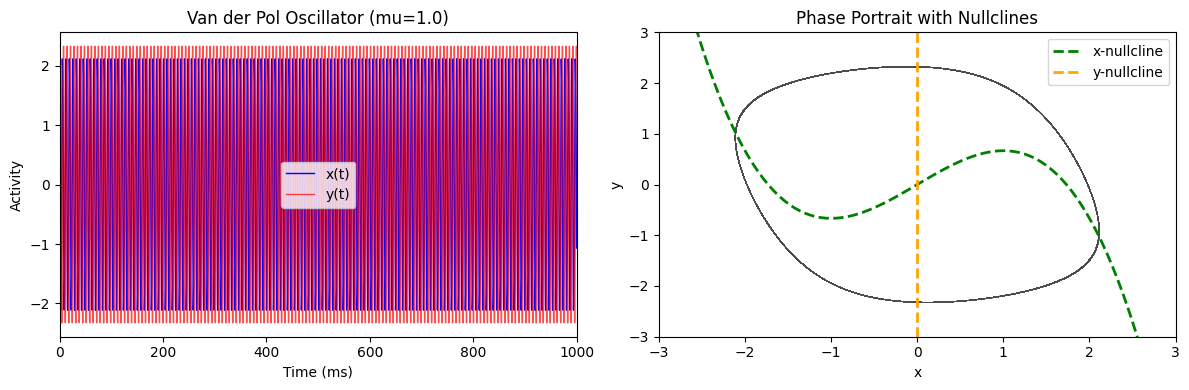

In [7]:
t_ms = indices * brainstate.environ.get_dt()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Time series
axes[0].plot(t_ms, x_trace[:, 0], 'b-', label='x(t)', linewidth=1)
axes[0].plot(t_ms, y_trace[:, 0], 'r-', label='y(t)', linewidth=1, alpha=0.7)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Activity')
axes[0].set_title(f'Van der Pol Oscillator (mu={node.mu.value()})')
axes[0].legend()
axes[0].set_xlim([0, 1000])

# Phase portrait
axes[1].plot(x_trace[:, 0], y_trace[:, 0], 'k-', linewidth=0.5, alpha=0.7)
# Mark nullclines
x_null = np.linspace(-3, 3, 100)
y_null = x_null - x_null**3/3  # x-nullcline: y = x - x^3/3
axes[1].plot(x_null, y_null, 'g--', label='x-nullcline', linewidth=2)
axes[1].axvline(0, color='orange', linestyle='--', label='y-nullcline', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Phase Portrait with Nullclines')
axes[1].legend()
axes[1].set_xlim([-3, 3])
axes[1].set_ylim([-3, 3])

plt.tight_layout()
plt.show()

In [8]:
@brainstate.transform.jit(static_argnums=1, static_argnames='n_step')
def simulate(mu_val, n_step: int = 30000):
    model = brainmass.VanDerPolStep(1, mu=mu_val)
    model.init_all_states()
    model.x.value = np.array([0.5])
    model.y.value = np.array([0.0])

    # Simulate
    def step(i):
        model.update()
        return model.x.value, model.y.value

    return brainstate.transform.for_loop(step, np.arange(n_step))


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\1202397000.py:13: SyntaxWarning: invalid escape sequence '\m'
  axes[0, idx].set_title(f'$\mu$ = {mu_val}')


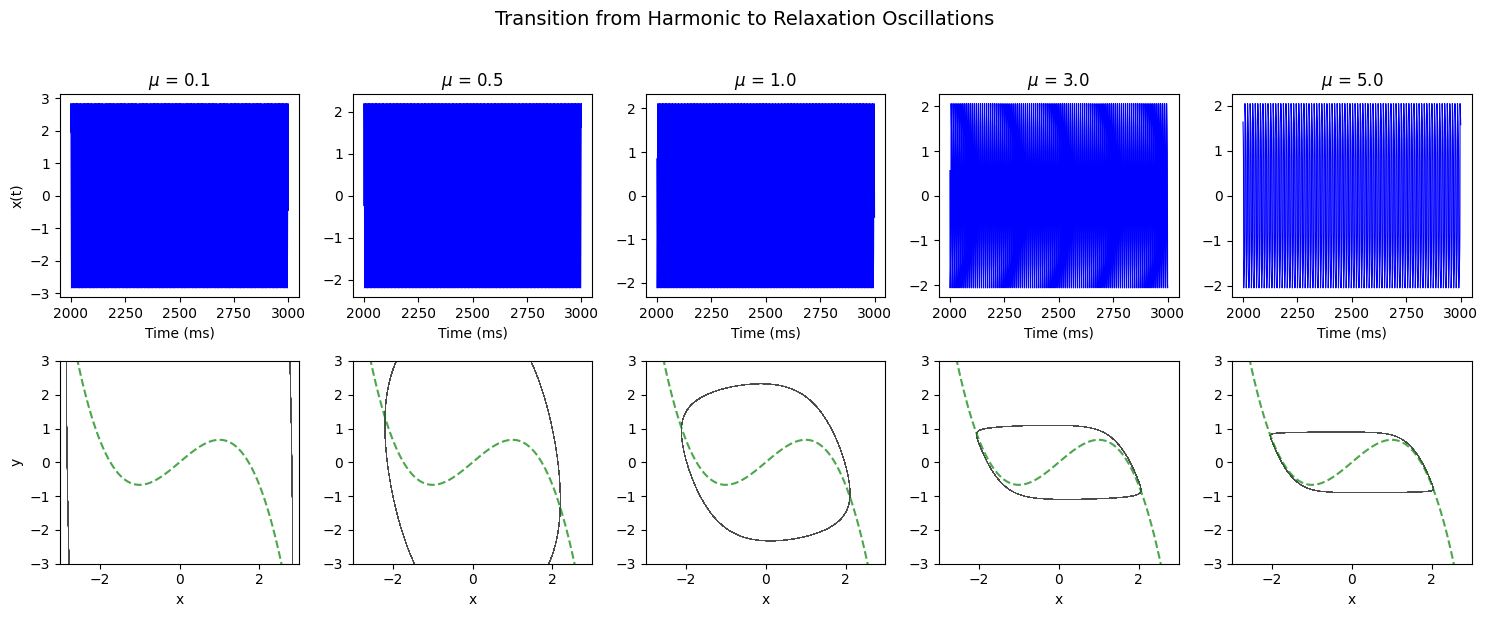

In [9]:
# Different mu values
mu_values = [0.1, 0.5, 1.0, 3.0, 5.0]

fig, axes = plt.subplots(2, len(mu_values), figsize=(15, 6))

for idx, mu_val in enumerate(mu_values):
    # Create oscillator
    x, y = simulate(mu_val, 30000)

    # Time series (top row)
    t = np.arange(30000) * brainstate.environ.get_dt()
    axes[0, idx].plot(t[-10000:], x[-10000:, 0], 'b-', linewidth=0.8)
    axes[0, idx].set_title(f'$\mu$ = {mu_val}')
    axes[0, idx].set_xlabel('Time (ms)')
    if idx == 0:
        axes[0, idx].set_ylabel('x(t)')

    # Phase portrait (bottom row)
    axes[1, idx].plot(x[-10000:, 0], y[-10000:, 0], 'k-', linewidth=0.3, alpha=0.7)
    # Nullcline
    x_null = np.linspace(-3, 3, 100)
    axes[1, idx].plot(x_null, x_null - x_null ** 3 / 3, 'g--', linewidth=1.5, alpha=0.7)
    axes[1, idx].set_xlabel('x')
    if idx == 0:
        axes[1, idx].set_ylabel('y')
    axes[1, idx].set_xlim([-3, 3])
    axes[1, idx].set_ylim([-3, 3])

plt.suptitle('Transition from Harmonic to Relaxation Oscillations', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\3352352769.py:24: SyntaxWarning: invalid escape sequence '\m'
  axes[0, idx].set_title(f'$\mu$ = {mu_val}')


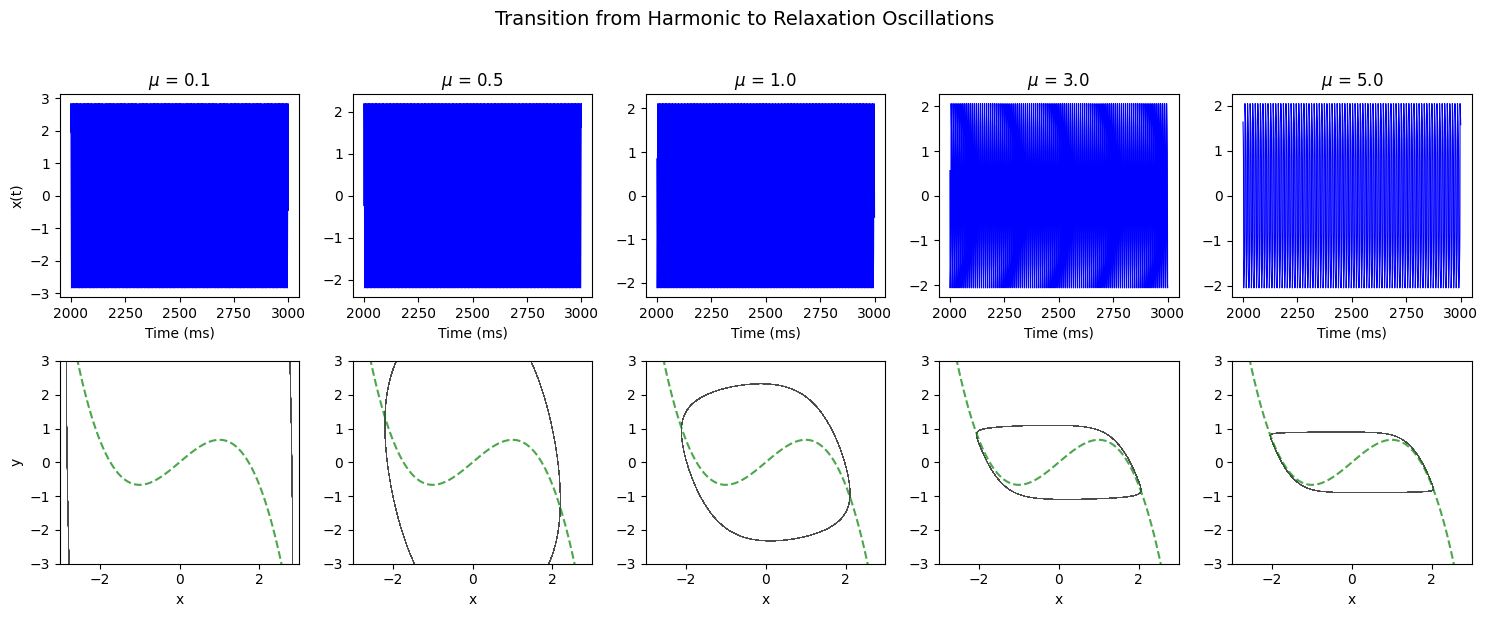

In [10]:
# Different mu values
mu_values = [0.1, 0.5, 1.0, 3.0, 5.0]

fig, axes = plt.subplots(2, len(mu_values), figsize=(15, 6))

for idx, mu_val in enumerate(mu_values):
    # Create oscillator
    model = brainmass.VanDerPolStep(1, mu=mu_val)
    brainstate.nn.init_all_states(model)
    model.x.value = np.array([0.5])
    model.y.value = np.array([0.0])
    
    # Simulate
    def step(i):
        with brainstate.environ.context(i=i, t=i * brainstate.environ.get_dt()):
            model.update()
            return model.x.value, model.y.value
    
    x, y = brainstate.transform.for_loop(step, np.arange(30000))
    t = np.arange(30000) * brainstate.environ.get_dt()
    
    # Time series (top row)
    axes[0, idx].plot(t[-10000:], x[-10000:, 0], 'b-', linewidth=0.8)
    axes[0, idx].set_title(f'$\mu$ = {mu_val}')
    axes[0, idx].set_xlabel('Time (ms)')
    if idx == 0:
        axes[0, idx].set_ylabel('x(t)')
    
    # Phase portrait (bottom row)
    axes[1, idx].plot(x[-10000:, 0], y[-10000:, 0], 'k-', linewidth=0.3, alpha=0.7)
    # Nullcline
    x_null = np.linspace(-3, 3, 100)
    axes[1, idx].plot(x_null, x_null - x_null**3/3, 'g--', linewidth=1.5, alpha=0.7)
    axes[1, idx].set_xlabel('x')
    if idx == 0:
        axes[1, idx].set_ylabel('y')
    axes[1, idx].set_xlim([-3, 3])
    axes[1, idx].set_ylim([-3, 3])

plt.suptitle('Transition from Harmonic to Relaxation Oscillations', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\2480255506.py:13: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title('Relaxation Oscillation ($\mu=5$)')


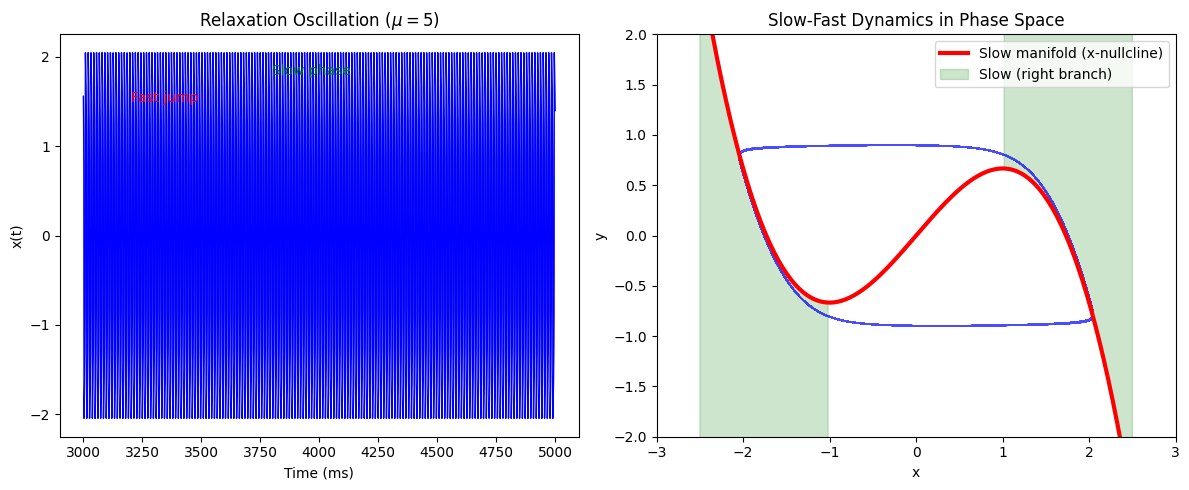

In [11]:
x, y = simulate(5.0, 50000)
t = np.arange(50000) * brainstate.environ.get_dt()

# Focus on steady state
x_ss, y_ss, t_ss = x[-20000:, 0], y[-20000:, 0], t[-20000:]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Time series with annotations
axes[0].plot(t_ss, x_ss, 'b-', linewidth=1)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('x(t)')
axes[0].set_title('Relaxation Oscillation ($\mu=5$)')

# Annotate phases
axes[0].annotate('Fast jump', xy=(t_ss[2000], 1.5), fontsize=10, color='red')
axes[0].annotate('Slow phase', xy=(t_ss[8000], 1.8), fontsize=10, color='green')

# Phase portrait showing slow-fast structure
axes[1].plot(x_ss, y_ss, 'b-', linewidth=1, alpha=0.7)

# Nullcline (cubic)
x_null = np.linspace(-2.5, 2.5, 200)
y_null = x_null - x_null ** 3 / 3
axes[1].plot(x_null, y_null, 'r-', linewidth=3, label='Slow manifold (x-nullcline)')

# Mark regions
axes[1].fill_between(x_null[x_null > 1], y_null[x_null > 1], 5, alpha=0.2, color='green', label='Slow (right branch)')
axes[1].fill_between(x_null[x_null < -1], y_null[x_null < -1], -5, alpha=0.2, color='green')

axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Slow-Fast Dynamics in Phase Space')
axes[1].legend(loc='upper right')
axes[1].set_xlim([-3, 3])
axes[1].set_ylim([-2, 2])

plt.tight_layout()
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\2098452890.py:24: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title('Relaxation Oscillation ($\mu=5$)')


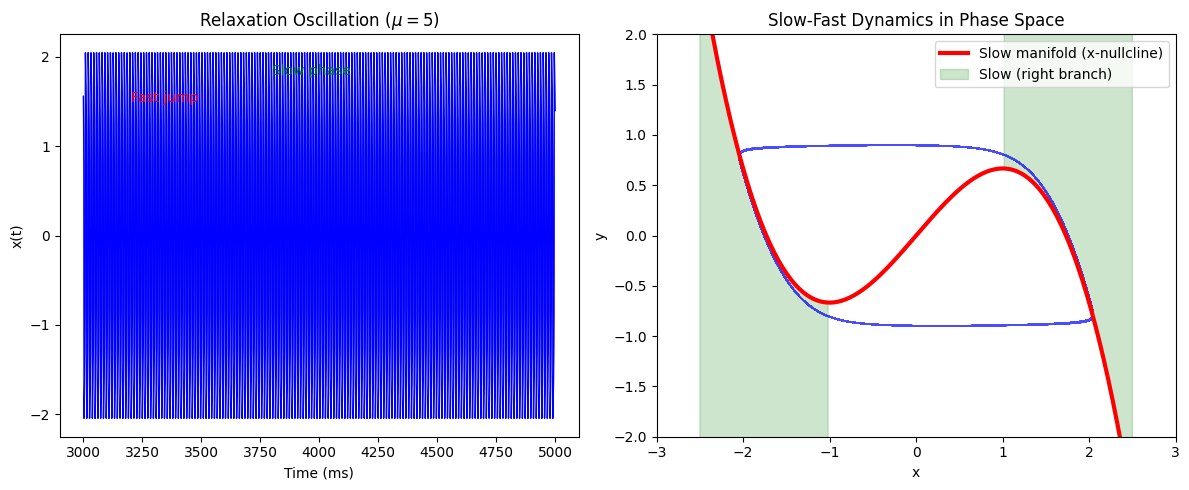

In [12]:
# High mu relaxation oscillator
model = brainmass.VanDerPolStep(1, mu=5.0)
brainstate.nn.init_all_states(model)
model.x.value = np.array([0.5])
model.y.value = np.array([0.0])

def step(i):
    with brainstate.environ.context(i=i, t=i * brainstate.environ.get_dt()):
        model.update()
        return model.x.value, model.y.value

x, y = brainstate.transform.for_loop(step, np.arange(50000))
t = np.arange(50000) * brainstate.environ.get_dt()

# Focus on steady state
x_ss, y_ss, t_ss = x[-20000:, 0], y[-20000:, 0], t[-20000:]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Time series with annotations
axes[0].plot(t_ss, x_ss, 'b-', linewidth=1)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('x(t)')
axes[0].set_title('Relaxation Oscillation ($\mu=5$)')

# Annotate phases
axes[0].annotate('Fast jump', xy=(t_ss[2000], 1.5), fontsize=10, color='red')
axes[0].annotate('Slow phase', xy=(t_ss[8000], 1.8), fontsize=10, color='green')

# Phase portrait showing slow-fast structure
axes[1].plot(x_ss, y_ss, 'b-', linewidth=1, alpha=0.7)

# Nullcline (cubic)
x_null = np.linspace(-2.5, 2.5, 200)
y_null = x_null - x_null**3/3
axes[1].plot(x_null, y_null, 'r-', linewidth=3, label='Slow manifold (x-nullcline)')

# Mark regions
axes[1].fill_between(x_null[x_null > 1], y_null[x_null > 1], 5, alpha=0.2, color='green', label='Slow (right branch)')
axes[1].fill_between(x_null[x_null < -1], y_null[x_null < -1], -5, alpha=0.2, color='green')

axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Slow-Fast Dynamics in Phase Space')
axes[1].legend(loc='upper right')
axes[1].set_xlim([-3, 3])
axes[1].set_ylim([-2, 2])

plt.tight_layout()
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\503894739.py:29: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$', fontsize=12)


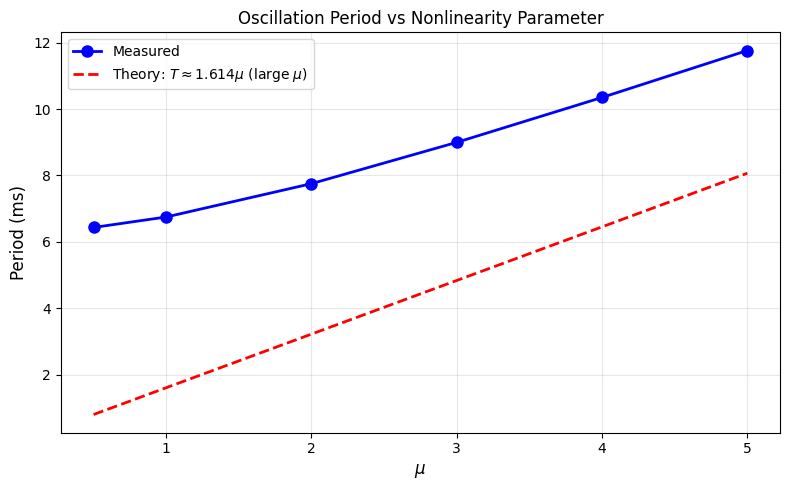

In [13]:
# Measure periods for different mu
mu_range = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0])
periods = []
dt = brainstate.environ.get_dt() / u.ms

for mu_val in mu_range:
    x, y = simulate(mu_val, 100000)

    # Find period from zero crossings
    x_ss = x[-50000:, 0]
    crossings = np.where(np.diff(np.sign(x_ss)) > 0)[0]
    if len(crossings) > 2:
        period = np.mean(np.diff(crossings)) * dt
        periods.append(period)
    else:
        periods.append(np.nan)

periods = np.array(periods)

# Plot period vs mu
plt.figure(figsize=(8, 5))
plt.plot(mu_range, periods, 'bo-', markersize=8, linewidth=2, label='Measured')

# Theoretical approximation for large mu: T ~ (3 - 2*log(2)) * mu ~ 1.614 * mu
mu_theory = np.linspace(0.5, 5, 50)
T_theory = (3 - 2 * np.log(2)) * mu_theory
plt.plot(mu_theory, T_theory, 'r--', linewidth=2, label=r'Theory: $T \approx 1.614 \mu$ (large $\mu$)')

plt.xlabel('$\mu$', fontsize=12)
plt.ylabel('Period (ms)', fontsize=12)
plt.title('Oscillation Period vs Nonlinearity Parameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
C:\Users\adadu\AppData\Local\Temp\ipykernel_21648\4087857840.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$', fontsize=12)


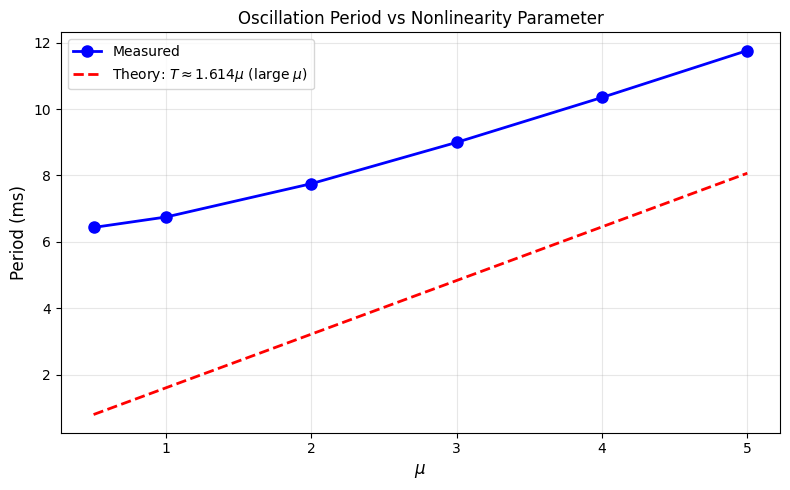

In [14]:
# Measure periods for different mu
mu_range = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0])
periods = []

for mu_val in mu_range:
    model = brainmass.VanDerPolStep(1, mu=mu_val)
    brainstate.nn.init_all_states(model)
    model.x.value = np.array([0.5])
    
    def step(i):
        with brainstate.environ.context(i=i, t=i * brainstate.environ.get_dt()):
            model.update()
            return model.x.value
    
    x = brainstate.transform.for_loop(step, np.arange(100000))
    
    # Find period from zero crossings
    x_ss = x[-50000:, 0]
    crossings = np.where(np.diff(np.sign(x_ss)) > 0)[0]
    if len(crossings) > 2:
        period = np.mean(np.diff(crossings)) * float(brainstate.environ.get_dt() / u.ms)
        periods.append(period)
    else:
        periods.append(np.nan)

periods = np.array(periods)

# Plot period vs mu
plt.figure(figsize=(8, 5))
plt.plot(mu_range, periods, 'bo-', markersize=8, linewidth=2, label='Measured')

# Theoretical approximation for large mu: T ~ (3 - 2*log(2)) * mu ~ 1.614 * mu
mu_theory = np.linspace(0.5, 5, 50)
T_theory = (3 - 2*np.log(2)) * mu_theory
plt.plot(mu_theory, T_theory, 'r--', linewidth=2, label=r'Theory: $T \approx 1.614 \mu$ (large $\mu$)')

plt.xlabel('$\mu$', fontsize=12)
plt.ylabel('Period (ms)', fontsize=12)
plt.title('Oscillation Period vs Nonlinearity Parameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

In this tutorial, you learned:

1. **Van der Pol equations**: The Lienard form with nonlinear damping
2. **Parameter $\mu$**: Controls transition from harmonic to relaxation oscillations
3. **Relaxation oscillations**: Characterized by slow phases and fast jumps
4. **Slow-fast dynamics**: The trajectory follows the nullcline during slow phases

### Key Insights

- Van der Pol captures **threshold dynamics** relevant to neural excitability
- Large $\mu$ creates **spike-like** waveforms similar to action potentials
- The model exhibits **limit cycle** oscillations for all $\mu > 0$


## References

1. van der Pol, B. (1926). On relaxation-oscillations. *The London, Edinburgh, and Dublin Philosophical Magazine*, 2(11), 978-992.

2. FitzHugh, R. (1961). Impulses and physiological states in theoretical models of nerve membrane. *Biophysical Journal*, 1(6), 445-466.

3. Strogatz, S. H. (2015). *Nonlinear Dynamics and Chaos*. Westview Press. (Chapter 7)